In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from sklearn.metrics import pairwise_distances

import gudhi as gd


Here is Needham's code for sphere sampling.

In [2]:
# Define a function to sample randomly from a sphere
def sample_spherical(npoints, ndim=3):
    sample = np.random.randn(ndim, npoints)
    sample /= np.linalg.norm(sample, axis=0)
    sample = sample.T
    return sample

We now compute persistence homology, using the same `gudhi` code as before.

There are several things I want to point out here. First, note that the `RipsComplex` function has a `max_edge_length` parameter. This tells the software to truncate the Vietoris-Rips complex at a certain point.

Next, the `create_simplex_tree` function has a `max_dimension` parameter, telling the software to ignore simplices in higher dimensions. Here, we are sampling a sphere, which is a 2-dimensional object, and we only care about $H_0$, $H_1$, and $H_2$. Since simplices in higher dimensions won't change these homology groups, we can ignore them.

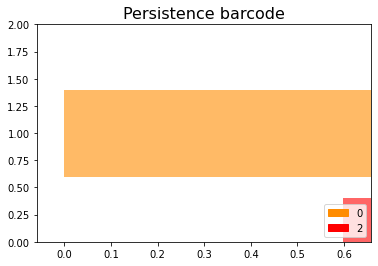

In [9]:
data = sample_spherical(300,3)
D = pairwise_distances(data)
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 0.6) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 3)
BarCodes = Rips_complex.persistence(persistence_dim_max = False,min_persistence = 1.0)

gd.plot_persistence_barcode(BarCodes,legend=True,colormap=['darkorange','blue','red','yellow'])
plt.show()

The `simplex_tree`'s function `persistence()` has two relevant parameters. First is the `persistence_dim_max` flag, which tells the software whether or not to display the top homology (here that would be $H_3$). By default, this is set to `False`. This is a good thing, since, if we are telling the software to ignore higher simplices, then the top-dimensional homology will be full of garbage! 

Here's what we get if we set that flag to `True`.

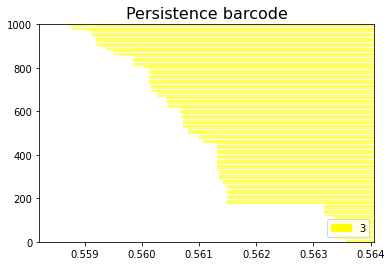

In [10]:
BarCodes = Rips_complex.persistence(persistence_dim_max = True,min_persistence = 1.0)

gd.plot_persistence_barcode(BarCodes,legend=True,colormap=['darkorange','blue','red','yellow'])
plt.show()

The $H_0$ and $H_1$ barcodes are drowned out by the noise from $H_3$!

Finally, the `min_persistence` parameter is useful. This tells the software to only display barcodes that are long enough. 

Here's what we get if we display all barcodes of length at least $0.2$.

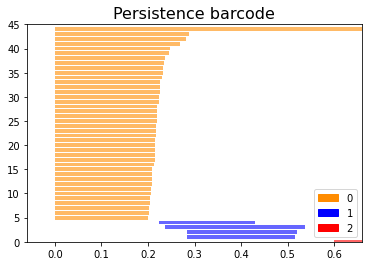

In [12]:
BarCodes = Rips_complex.persistence(persistence_dim_max = False,min_persistence = 0.2)

gd.plot_persistence_barcode(BarCodes,legend=True,colormap=['darkorange','blue','red','yellow'])
plt.show()

And now all positive length barcodes.

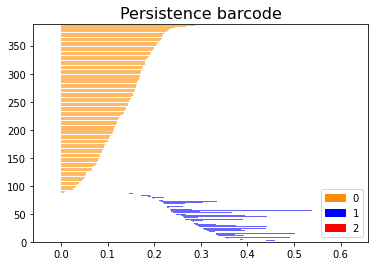

In [13]:
BarCodes = Rips_complex.persistence(persistence_dim_max = False,min_persistence = 0)

gd.plot_persistence_barcode(BarCodes,legend=True,colormap=['darkorange','blue','red','yellow'])
plt.show()

We can try playing around with the `max_edge_length`.

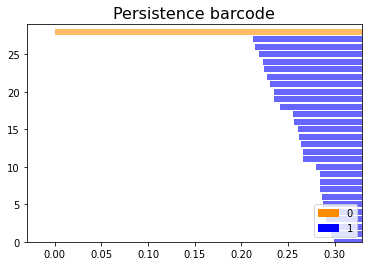

In [14]:
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 0.3) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 3)
BarCodes = Rips_complex.persistence(persistence_dim_max = False,min_persistence = 1.0)

gd.plot_persistence_barcode(BarCodes,legend=True,colormap=['darkorange','blue','red','yellow'])
plt.show()

Choosing a long `max_edge_length` makes the computation run much longer!

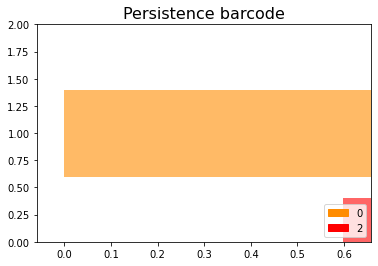

In [15]:
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 1.3) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 3)
BarCodes = Rips_complex.persistence(persistence_dim_max = False,min_persistence = 1.0)

gd.plot_persistence_barcode(BarCodes,legend=True,colormap=['darkorange','blue','red','yellow'])
plt.show()

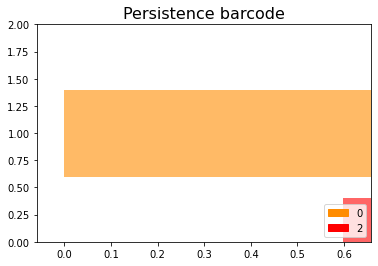

In [16]:
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 0.6) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 4)
BarCodes = Rips_complex.persistence(persistence_dim_max = False,min_persistence = 1.0)

gd.plot_persistence_barcode(BarCodes,legend=True,colormap=['darkorange','blue','red','yellow'])
plt.show()

`Binder` complained about the following one, if using a longer `max_edge_length` and going up to dimension 4.

In [ ]:
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 1.1) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 4)
BarCodes = Rips_complex.persistence(persistence_dim_max = False,min_persistence = 1.0)

gd.plot_persistence_barcode(BarCodes,legend=True,colormap=['darkorange','blue','red','yellow'])
plt.show()